# Example usage of the `Prec6dq10_20M`, `Prec7dq10_20M` fitting models

`Prec6dq10_20M` models ampitudes of the ringdown from a quasi-circular, precessing black-hole binary. It is calibrated up to mass ratio 10 and at a starting time $t_{\rm start}=20M$ from $t_{\rm EMOP}$.  

Alongside GPR models for mode amplitude values, we provide models calibrated on the Leave-One-Out cross-validation absolute error on mode amplitude. These can be used to estimate model uncertainty on the predicted values. GPR natively provides a mean value $\mu_{\rm GPR}$ and an uncertainty estimate $\sigma_{\rm GPR}$, but, as we explain in the paper, this only describes "epistemic uncertainy", and should be considered with caution.  

We also provide 6D and 7D models of $\Delta t_{\rm EMOP}$, which is the distance in time between $t_{\rm EMOP}$ and the total waveform peak $t_{\rm peak\_norm} = \max\limits_{t} \sqrt{\sum_{l,m}\left| h_{l,m} \right|^2}$

In [1]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
import postmerger as pm

## Load fit

In [2]:
fit_6d = pm.load_fit('Prec6dq10_20M',download=False)
fit_6d

ValueError: Fit file is missing! Consider using the option download=True to download the file from the corresponding zenodo repository.

## Read documentation

In [4]:
help(fit_6d)

Help on AmplitudeFitPrec6dq10 in module postmerger._fits object:

class AmplitudeFitPrec6dq10(builtins.object)
 |  AmplitudeFitPrec6dq10(fit_dict)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, fit_dict)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __print__(self)
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  predict_abs_err(self, delta, chi_s, chi_a, rem_spin_angle, kick_angle, kick_vel, lm, mode, return_std=False, start_time=None, final_mass_val=None, final_spin_val=None)
 |      Predict the cross-validation absolute error on A_lm corresponding to the query points.
 |      
 |      
 |      Parameters
 |      ----------
 |      mass_ratio : array_like of shape (n_samples,) or float
 |          Mass ratio of the query points.
 |      
 |      chi1z : array_like of shape (n_samples,) or float
 |          Projection along the z axis of the primary spin.
 |      
 |      chi2z : array_like of shape (n_samples,) or float
 |         

## Predict amplitudes

In [5]:
## inspect available modes
## syntax: {(l,m): lm_modes}
## Since $(2,0)$ mode is not circularly poalrized, we model the real and imaginary parts as different modes.
fit_6d.modes

{(2, 2): [(2, 2, 0)],
 (2, 1): [(2, 1, 0)],
 (3, 3): [(3, 3, 0)],
 (2, 0): [(2, 0, 0, 're'), (2, 0, 0, 'im')]}

In [6]:
#####################################
## 6D model

## binary parameters
mass_ratio = 1.5 # defined to be >=1
chi1z = 0.1
chi2z = 0.3
theta_f = 0.2 # Angle between remnant spin and orbital angular momentum at ISCO
phi_k = 0. # Angle between remnant spin and the recoil kick velocity
v_k = 0.1 # Magnitude of the recoil kick velocity

## Utility functions
delta = pm.delta_from_q(mass_ratio)
chi_s = pm.chi_s_from_spins(mass_ratio,chi1z,chi2z)
chi_a = pm.chi_a_from_spins(mass_ratio,chi1z,chi2z)

## spherical-harmonic indices
lm = (2,0)

## mode indices
mode = (2,0,0,'re')

## predict
amp = fit_6d.predict_amp(delta, chi_s, chi_a, theta_f, phi_k, v_k ,lm,mode,return_std=False)
abs_err = fit_6d.predict_abs_err(delta, chi_s, chi_a, theta_f, phi_k, v_k ,lm,mode,return_std=False)

## results
print('Amplitude (+/-) abs_err/2')
print('6D model')
print(f'Mode {mode}:\t  {amp[0]:.2E}(+/-){abs_err[0]/2:.2E}')

Amplitude (+/-) abs_err/2
6D model
Mode (2, 0, 0, 're'):	  1.33E-02(+/-)1.14E-03


By default, predicitions are returned at a starting time $20M$ after $t_{\rm EMOP}$. You can retrodict (or postdict) the predictions to a different starting time using the `start_time` argument, after providing the remnant spin and mass:

In [7]:
## start time in units of the initial total mass M
start_time = 10
final_mass_val = 0.90
final_spin_val = 0.90
## predict
amp = fit_6d.predict_amp(delta, chi_s, chi_a, theta_f, phi_k, v_k ,lm,mode,
                    final_mass_val=final_mass_val,
                    final_spin_val=final_spin_val,
                    start_time=start_time, return_std=False)
abs_err = fit_6d.predict_abs_err(delta, chi_s, chi_a, theta_f, phi_k, v_k ,lm,mode, 
                    final_mass_val=final_mass_val,
                    final_spin_val=final_spin_val,
                    start_time=start_time, return_std=False)

## results
print('Amplitude (+/-) abs_err/2')
print(f'Mode {mode}:\t  {amp[0]:.2E}(+/-){abs_err[0]/2:.2E}')

Amplitude (+/-) abs_err/2
Mode (2, 0, 0, 're'):	  1.55E-02(+/-)1.32E-03


## Batch evaluation

In [8]:
## binary parameters
## Utility functions
delta = np.linspace(0,0.6,50)
chi_s = 0.
chi_a = 0.
theta_f = 0.5# Angle between remnant spin and orbital angular momentum at ISCO
phi_k = np.flip(np.linspace(0,np.pi,50)) # Angle between remnant spin and the recoil kick velocity
v_k = 0.0025 # Magnitude of the recoil kick velocity

In [9]:
## spherical-harmonic indices
lm = (2,2)

## mode indices
mode = (2,2,0)

## predict
amp, sigma_amp = fit_6d.predict_amp(delta, chi_s, chi_a, theta_f, phi_k, v_k ,lm,mode,return_std=True)
abs_err = fit_6d.predict_abs_err(delta, chi_s, chi_a, theta_f, phi_k, v_k ,lm,mode,return_std=False)

samples = fit_6d.sample_amp(delta, chi_s, chi_a, theta_f, phi_k, v_k ,lm,mode, n_samples = 5)

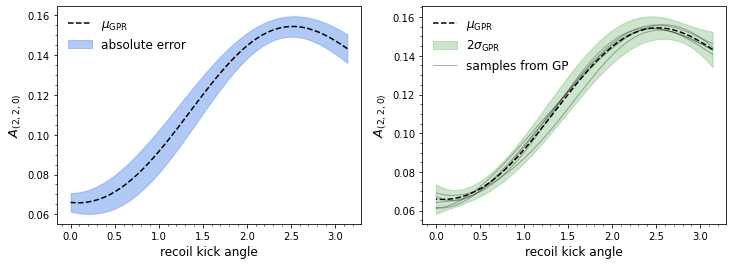

In [10]:
fig, axs = plt.subplots(1,2,figsize=(12,4))

varying = phi_k

ax = axs[0]
ax.plot(varying,amp,color='k',linestyle='--',label=r'$\mu_{\rm GPR}$')
ax.fill_between(varying,amp-abs_err,amp+abs_err,alpha=0.5,\
                 color='cornflowerblue',label='absolute error')
ax.set_xlabel('recoil kick angle',fontsize=12)
ax.set_ylabel(f'$A_{{{mode}}}$',fontsize=13)
ax.minorticks_on()
ax.legend(fontsize=12,frameon=False)

ax = axs[1]
ax.plot(varying,amp,color='k',linestyle='--',label=r'$\mu_{\rm GPR}$')
ax.fill_between(varying,amp-2*sigma_amp,amp+2*sigma_amp,alpha=0.2,\
                 color='green',label=r'$2\sigma_{\rm GPR}$')
ax.plot(varying, samples[:,0], ls='-', c='k', lw=1, alpha=0.3, label='samples from GP')
ax.plot(varying, samples[:,1:], ls='-', c='k', lw=1, alpha=0.3,)
ax.set_xlabel('recoil kick angle',fontsize=12)
ax.set_ylabel(f'$A_{{{mode}}}$',fontsize=13)
ax.minorticks_on()
ax.legend(fontsize=12,frameon=False)
plt.show()

## Prediction of $t_{\rm EMOP}$ 

__Document Here?__

In [15]:
## binary parameters
## Utility functions
delta = np.linspace(0,0.8,50)
chi_s = np.flip(np.linspace(-1.,1.,50))
chi_a = np.flip(np.linspace(-1.,1.,50))
theta_f = 0.5# Angle between remnant spin and orbital angular momentum at ISCO
phi_k = np.pi/2 # Angle between remnant spin and the recoil kick velocity
v_k = 0.0025 # Magnitude of the recoil kick velocity

In [16]:
## predict
temop, sigma_temop = fit_6d.predict_t_emop(delta, chi_s, chi_a, theta_f, phi_k, v_k ,return_std=True)
temop_abs_err = fit_6d.predict_t_emop_abs_err(delta, chi_s, chi_a, theta_f, phi_k, v_k ,return_std=False)

samples = fit_6d.sample_t_emop(delta, chi_s, chi_a, theta_f, phi_k, v_k ,n_samples = 5)

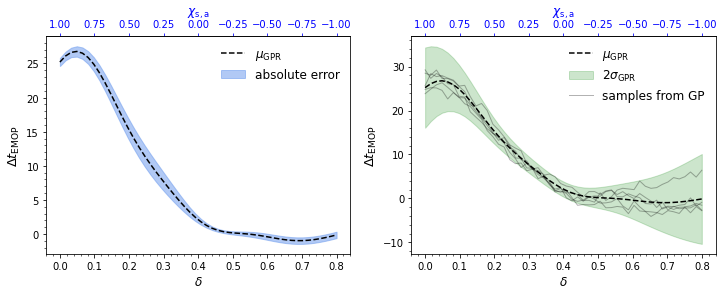

In [17]:
from matplotlib.ticker import FuncFormatter
from scipy.interpolate import interp1d
fig, axs = plt.subplots(1,2,figsize=(12,4))

varying = delta
varying2 = chi_s

ax = axs[0]
ax.plot(varying,temop,color='k',linestyle='--',label=r'$\mu_{\rm GPR}$')
ax.fill_between(varying,temop-temop_abs_err,temop+temop_abs_err,alpha=0.5,\
                 color='cornflowerblue',label='absolute error')
ax.set_xlabel(r'$\delta$',fontsize=12)
ax.set_ylabel(r'$\Delta t_{\rm EMOP}$',fontsize=13)
ax.minorticks_on()
ax.legend(fontsize=12,frameon=False)
# Create secondary x-axis
fwd = interp1d(varying, varying2, kind='linear', fill_value='extrapolate')
inv = interp1d(varying2, varying, kind='linear', fill_value='extrapolate')
secax = ax.secondary_xaxis('top', functions=(fwd, inv))
secax.set_xlabel(r'$\chi_{\rm s,a}$', fontsize=12, color='b')
secax.tick_params(labelsize=10, colors='b')

ax = axs[1]
ax.plot(varying,temop,color='k',linestyle='--',label=r'$\mu_{\rm GPR}$')
ax.fill_between(varying,temop-2*sigma_temop,temop+2*sigma_temop,alpha=0.2,\
                 color='green',label=r'$2\sigma_{\rm GPR}$')
ax.plot(varying, samples[:,0], ls='-', c='k', lw=1, alpha=0.3, label='samples from GP')
ax.plot(varying, samples[:,1:], ls='-', c='k', lw=1, alpha=0.3,)
ax.set_xlabel(r'$\delta$',fontsize=12)
ax.set_ylabel(r'$\Delta t_{\rm EMOP}$',fontsize=13)
ax.minorticks_on()
ax.legend(fontsize=12,frameon=False)
# Create secondary x-axis
fwd = interp1d(varying, varying2, kind='linear', fill_value='extrapolate')
inv = interp1d(varying2, varying, kind='linear', fill_value='extrapolate')
secax = ax.secondary_xaxis('top', functions=(fwd, inv))
secax.set_xlabel(r'$\chi_{\rm s,a}$', fontsize=12, color='b')
secax.tick_params(labelsize=10, colors='b')

# 7D model example

In [12]:
fit_7d = pm.load_fit('Prec7dq10_20M',download=True)
fit_7d

File not found locally. Downloading from https://sandbox.zenodo.org/records/200607/files/Prec7dq10_20M_gpr.pkl?download=1...
Download complete: /home/costantino/Scrivania/packages/git/postmerger/postmerger/data/trained_models/Prec7dq10_20M_gpr.pkl


/home/costantino/anaconda3/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.6.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/costantino/anaconda3/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator GaussianProcessRegressor from version 1.6.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/costantino/anaconda3/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.6.1 when using ve

Prec7dq10_20M models amplitudes of the ringdown from a quasi-circular, precessing black-hole binary.
It is calibrated up to mass ratio 10 and at a starting time 20M from t_emop of the simulation.
It also provides an uncertainty estimate calibrated on the cross-validation absolute error on the amplitude values.

In [13]:
#####################################
## 7D model

## binary parameters
mass_ratio = 1.5 # defined to be >=1
delta = pm.delta_from_q(mass_ratio)

chi1x = 0.15
chi1y = 0.1
chi1z = 0.1
#
chi2x = 0.3
chi2y = 0.2
chi2z = 0.3

## spherical-harmonic indices
lm = (2,2)

## mode indices
mode = (2,2,0)

## predict
amp = fit_7d.predict_amp(delta, chi1x, chi1y, chi1z, chi2x, chi2y, chi2z, lm, mode, return_std=False)
abs_err = fit_7d.predict_abs_err(delta, chi1x, chi1y, chi1z, chi2x, chi2y, chi2z, lm, mode, return_std=False)

## results
print('Amplitude (+/-) abs_err/2')
print('7D model')
print(f'Mode {mode}:\t  {amp[0]:.3E}(+/-){abs_err[0]/2:.3E}')

Amplitude (+/-) abs_err/2
7D model
Mode (2, 2, 0):	  1.368E-01(+/-)4.204E-03


In [14]:
## start time in units of the initial total mass M
start_time = 10
final_mass_val = 0.90
final_spin_val = 0.90

## predict
amp = fit_7d.predict_amp(delta, chi1x, chi1y, chi1z, chi2x, chi2y, chi2z, lm, mode,
                    final_mass_val=final_mass_val,
                    final_spin_val=final_spin_val,
                    start_time=start_time, return_std=False)
abs_err = fit_7d.predict_abs_err(delta, chi1x, chi1y, chi1z, chi2x, chi2y, chi2z, lm, mode,
                    final_mass_val=final_mass_val,
                    final_spin_val=final_spin_val,
                    start_time=start_time, return_std=False)

## results
print('Amplitude (+/-) abs_err/2')
print('7D model')
print(f'Mode {mode}:\t  {amp[0]:.3E}(+/-){abs_err[0]/2:.3E}')

Amplitude (+/-) abs_err/2
7D model
Mode (2, 2, 0):	  2.812E-01(+/-)8.644E-03


## Batch evaluation

In [29]:
delta = np.linspace(0,0.8,50)
#
chi1x = 0.15
chi1y = 0.1
chi1z = 0.1
#
chi2x = 0.3
chi2y = 0.2
chi2z = 0.3

## spherical-harmonic indices
lm = (2,2)

## mode indices
mode = (2,2,0)

amp, sigma_amp = fit_7d.predict_amp(delta, chi1x, chi1y, chi1z, chi2x, chi2y, chi2z, lm, mode, return_std=True)
abs_err = fit_7d.predict_abs_err(delta, chi1x, chi1y, chi1z, chi2x, chi2y, chi2z, lm, mode, return_std=False)

samples = fit_7d.sample_amp(delta, chi1x, chi1y, chi1z, chi2x, chi2y, chi2z, lm, mode, n_samples=5)

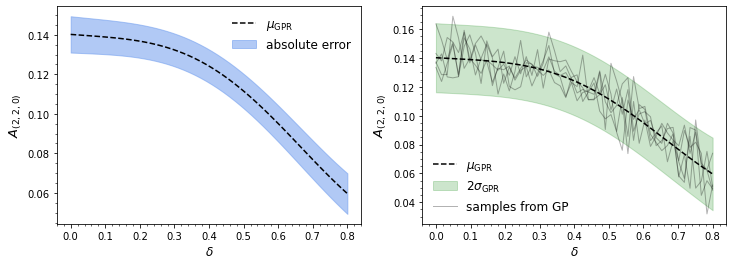

In [30]:
fig, axs = plt.subplots(1,2,figsize=(12,4))

varying = delta

ax = axs[0]
ax.plot(varying,amp,color='k',linestyle='--',label=r'$\mu_{\rm GPR}$')
ax.fill_between(varying,amp-abs_err,amp+abs_err,alpha=0.5,\
                 color='cornflowerblue',label='absolute error')
ax.set_xlabel(r'$\delta$',fontsize=12)
ax.set_ylabel(f'$A_{{{mode}}}$',fontsize=13)
ax.minorticks_on()
ax.legend(fontsize=12,frameon=False)

ax = axs[1]
ax.plot(varying,amp,color='k',linestyle='--',label=r'$\mu_{\rm GPR}$')
ax.fill_between(varying,amp-2*sigma_amp,amp+2*sigma_amp,alpha=0.2,\
                 color='green',label=r'$2\sigma_{\rm GPR}$')
ax.plot(varying, samples[:,0], ls='-', c='k', lw=1, alpha=0.3, label='samples from GP')
ax.plot(varying, samples[:,1:], ls='-', c='k', lw=1, alpha=0.3,)
ax.set_xlabel(r'$\delta$',fontsize=12)
ax.set_ylabel(f'$A_{{{mode}}}$',fontsize=13)
ax.minorticks_on()
ax.legend(fontsize=12,frameon=False)
plt.show()

## Prediction of $t_{\rm EMOP}$ 

In [31]:
delta = np.linspace(0,0.8,50)
chi1x = 0.
chi1y = 0.
chi1z = np.flip(np.linspace(-1.,1.,50))
chi2x = 0.1
chi2y = 0.
chi2z = 0.

## spherical-harmonic indices
lm = (2,2)

## mode indices
mode = (2,2,0)

temop, sigma_temop = fit_7d.predict_t_emop(delta, chi1x, chi1y, chi1z, chi2x, chi2y, chi2z, return_std=True)
temop_abs_err = fit_7d.predict_t_emop_abs_err(delta, chi1x, chi1y, chi1z, chi2x, chi2y, chi2z, return_std=False)

samples = fit_7d.sample_t_emop(delta, chi1x, chi1y, chi1z, chi2x, chi2y, chi2z, n_samples=5)

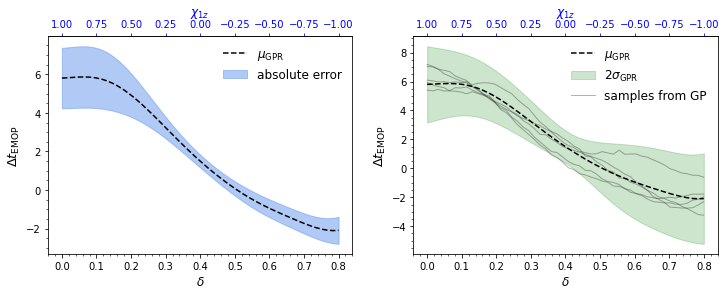

In [33]:
from matplotlib.ticker import FuncFormatter
from scipy.interpolate import interp1d
fig, axs = plt.subplots(1,2,figsize=(12,4))

varying = delta
varying2 = chi1z

ax = axs[0]
ax.plot(varying,temop,color='k',linestyle='--',label=r'$\mu_{\rm GPR}$')
ax.fill_between(varying,temop-temop_abs_err,temop+temop_abs_err,alpha=0.5,\
                 color='cornflowerblue',label='absolute error')
ax.set_xlabel(r'$\delta$',fontsize=12)
ax.set_ylabel(r'$\Delta t_{\rm EMOP}$',fontsize=13)
ax.minorticks_on()
ax.legend(fontsize=12,frameon=False)
# Create secondary x-axis
fwd = interp1d(varying, varying2, kind='linear', fill_value='extrapolate')
inv = interp1d(varying2, varying, kind='linear', fill_value='extrapolate')
secax = ax.secondary_xaxis('top', functions=(fwd, inv))
secax.set_xlabel(r'$\chi_{1z}$', fontsize=12, color='b')
secax.tick_params(labelsize=10, colors='b')

ax = axs[1]
ax.plot(varying,temop,color='k',linestyle='--',label=r'$\mu_{\rm GPR}$')
ax.fill_between(varying,temop-2*sigma_temop,temop+2*sigma_temop,alpha=0.2,\
                 color='green',label=r'$2\sigma_{\rm GPR}$')
ax.plot(varying, samples[:,0], ls='-', c='k', lw=1, alpha=0.3, label='samples from GP')
ax.plot(varying, samples[:,1:], ls='-', c='k', lw=1, alpha=0.3,)
ax.set_xlabel(r'$\delta$',fontsize=12)
ax.set_ylabel(r'$\Delta t_{\rm EMOP}$',fontsize=13)
ax.minorticks_on()
ax.legend(fontsize=12,frameon=False)
# Create secondary x-axis
fwd = interp1d(varying, varying2, kind='linear', fill_value='extrapolate')
inv = interp1d(varying2, varying, kind='linear', fill_value='extrapolate')
secax = ax.secondary_xaxis('top', functions=(fwd, inv))
secax.set_xlabel(r'$\chi_{1z}$', fontsize=12, color='b')
secax.tick_params(labelsize=10, colors='b')
plt.show()